In [20]:
!pip install yfinance pandas numpy matplotlib seaborn

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# TSLA = Tesla, VOO = Vanguard's S&P 500 ETF
tickers = ['TSLA', 'VOO']

# 2014-09-01 to 2024-09-01 (10 yars)
start_date = '2014-09-01'
end_date = '2024-09-01'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

print(data.head())


[*********************100%***********************]  2 of 2 completed

Ticker                          TSLA         VOO
Date                                            
2014-09-02 00:00:00+00:00  18.941334  154.140930
2014-09-03 00:00:00+00:00  18.746000  154.073868
2014-09-04 00:00:00+00:00  19.069332  153.822479
2014-09-05 00:00:00+00:00  18.492666  154.559906
2014-09-08 00:00:00+00:00  18.807333  154.166031


In [23]:
# daily returns
daily_returns = data.pct_change().dropna()

print(daily_returns.head())


Ticker                         TSLA       VOO
Date                                         
2014-09-03 00:00:00+00:00 -0.010313 -0.000435
2014-09-04 00:00:00+00:00  0.017248 -0.001632
2014-09-05 00:00:00+00:00 -0.030240  0.004794
2014-09-08 00:00:00+00:00  0.017016 -0.002548
2014-09-09 00:00:00+00:00 -0.012867 -0.006468


In [25]:
# volatility
volatility = daily_returns.std() * np.sqrt(252)  # there's 252 trading days in a year

print("Annual Volatility:")
print(volatility)


Annual Volatility:
Ticker
TSLA    0.561326
VOO     0.178026
dtype: float64


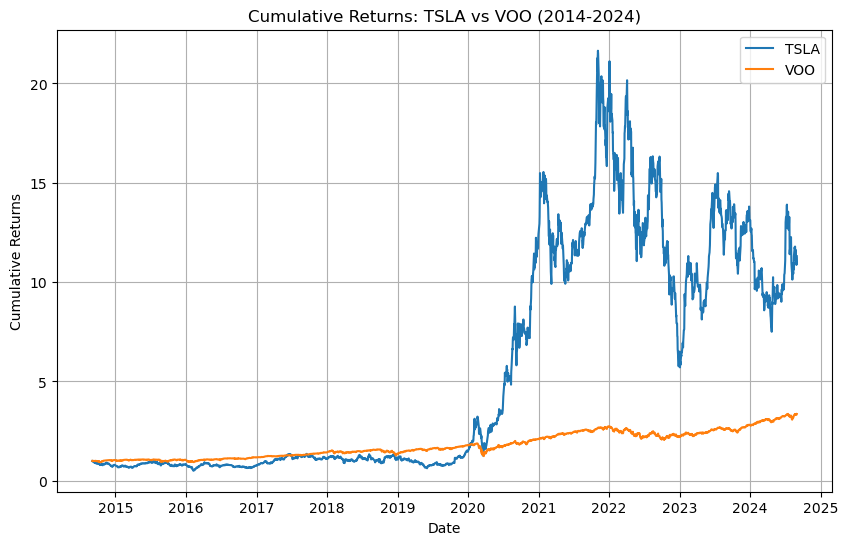

In [26]:
# cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns: TSLA vs VOO (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['TSLA', 'VOO'])
plt.grid(True)
plt.show()


In [27]:
# annual returns
annualized_returns = daily_returns.mean() * 252

risk_free_rate = 0

# sharpe ratio
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility

print("Sharpe Ratio:")
print(sharpe_ratio)


Sharpe Ratio:
Ticker
TSLA    0.712956
VOO     0.771512
dtype: float64


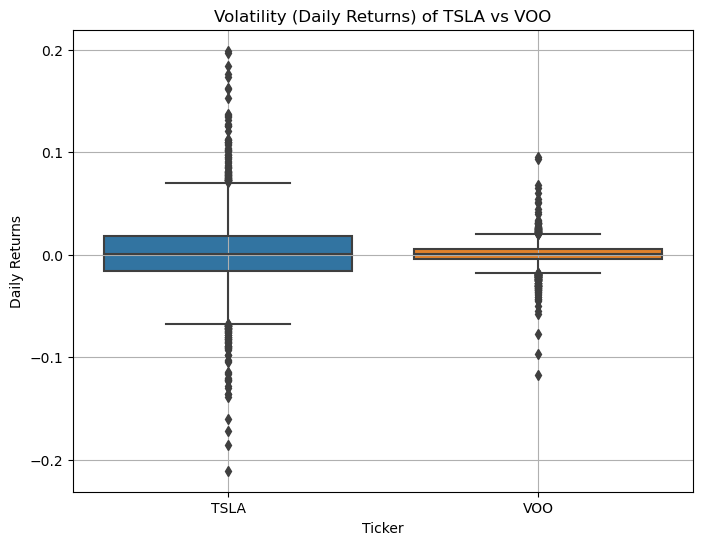

In [28]:
# volatility of daily returns for TSLA and VOO
plt.figure(figsize=(8, 6))
sns.boxplot(data=daily_returns)
plt.title('Volatility (Daily Returns) of TSLA vs VOO')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.show()


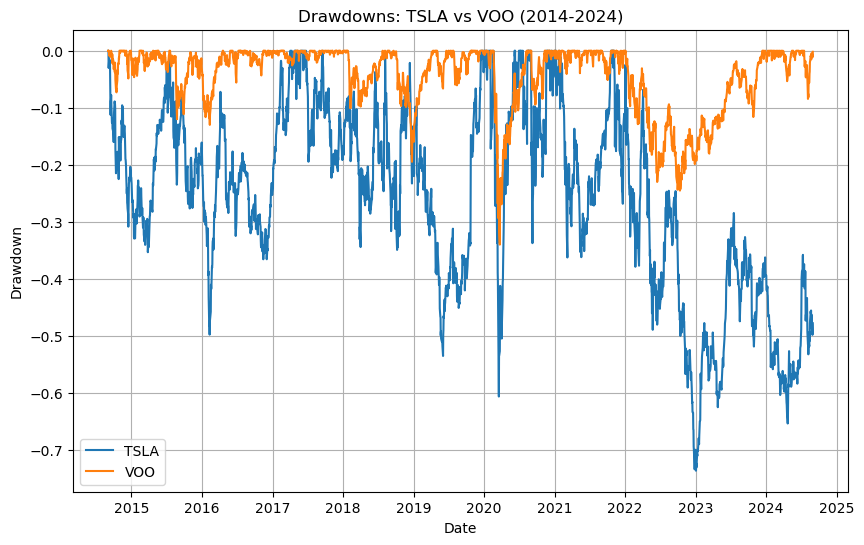

In [29]:
# rolling maximum
rolling_max = cumulative_returns.cummax()

# drawdown
drawdown = (cumulative_returns - rolling_max) / rolling_max

plt.figure(figsize=(10, 6))
plt.plot(drawdown)
plt.title('Drawdowns: TSLA vs VOO (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend(['TSLA', 'VOO'])
plt.grid(True)
plt.show()
